# Simple Linear Regression #
### Programming for Data Applications (CSCI 250) ###

Linear regression is a very simple method but has proven to be very useful for a large number of
situations.
Let’s take a look at these data points

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dict = {'x':[1,2,4,3,5],
       'y':[1,3,3,2,5]}
data = pd.DataFrame(dict)
data

,x,y
0,1,1
1,2,3
2,4,3
3,3,2
4,5,5


The attribute $x$ is the input variable and $y$ is the output variable that we are trying to predict. If
we got more data, we would only have $x$ values and we would be interested in predicting $y$
values. Below is a simple scatter plot of $x$ versus $y$.

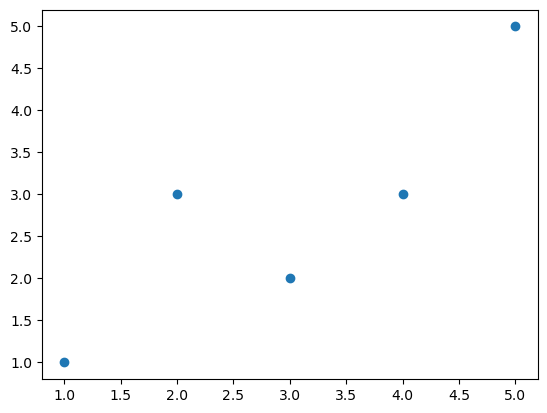

In [3]:
plt.figure(1)
plt.scatter(data.x,data.y)
plt.show()

We can see the relationship between x and y looks kind of linear. As in, we could probably draw a line somewhere diagonally from the bottom left of the plot to the top right to generally describe the relationship between the data. This is a good indication that using linear regression might be appropriate for this little dataset.When we have a single input attribute (x) and we want to use linear regression, this is called simple linear regression. 

If we had multiple input attributes (e.g. x1, x2, x3, etc.) This would be called multiple linear regression.
With simple linear regression we want to model our data as follows:

$y = B0 + B1 * x$

This is a line where $y$ is the output variable we want to predict, $x$ is the input variable we know and $B0$ and $B1$ are coefficients that we need to estimate to move the line around.

Technically, $B0$ is called the *intercept* because it determines where the line intercepts the y-
axis. In machine learning we can call this the bias, because it is added to offset all predictions
that we make. The $B1$ term is called the *slope* because it defines the slope of the line or how
x translates into a y value before we add our bias.
The goal is to find the best estimates for the coefficients to **minimize the errors** in predicting
y from x.

We can start off by estimating the value for B1 as:

$B1 = sum((x_i - mean(x)) * (y_i - mean(y))) / sum((x_i – mean(x))^2 )$

Where mean() is the average value for the variable in our dataset. The $x_i$ and $y_i$ refer to the
fact that we need to repeat these calculations across all values in our dataset and i refers to
the i’th value of x or y.

We can calculate B0 using B1 and some statistics from our dataset, as follows:

$B0 = mean(y) – B1 * mean(x)$

For our data:

$mean(x) = 3$

$mean(y) = 2.8$
which gives us:
$B1 = 0.8 and B0 = 0.4$

$y = 0.4 + 0.8 * x$

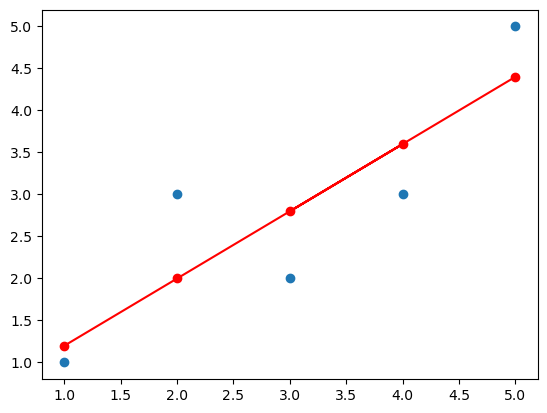

In [4]:
x = data.x
y = 0.4 + 0.8 * x
plt.figure(1)
plt.plot(x,y,c='r',marker='o')
plt.scatter(data.x,data.y)
plt.show()

We can calculate a error for our predictions called the **Root Mean Squared Error or RMSE**.

### $RMSE = sqrt( sum( (p_i – y_i )^2 )/n )$ ###

Where ***sqrt()*** is the square root function, ***p*** is the predicted value and ***y*** is the actual value, ***i*** is the index for a specific instance, ***n*** is the number of predictions, because we must calculate the error across all predicted values.


In [5]:
se = 0
print('pred-y\ty\terror\tsq-error')
for x in range(len(y)):
    print("%.1f\t%.1f\t%.1f\t%.2f" % (data.y[x],y[x],data.y[x]-y[x],(data.y[x]-y[x])**2))
    se = se + (data.y[x]-y[x])**2
mse = se / len(y)
rmse = np.sqrt(mse)
print("RMSE = ", rmse)
    

pred-y	y	error	sq-error
1.0	1.2	-0.2	0.04
3.0	2.0	1.0	1.00
3.0	3.6	-0.6	0.36
2.0	2.8	-0.8	0.64
5.0	4.4	0.6	0.36
RMSE =  0.6928203230275509


For our data:

***RMSE = 0.6928***

Or, each prediction is on average wrong by about 0.693 units.

## Shortcut ##

Simple linear regression is the simplest form of regression and the most studied. There is a shortcut that you can use to quickly estimate the values for $B0$ and $B1$.

The calculation of $B1$ can be re-written as:

$B1 = corr(x, y) * stdev(y) / stdev(x)$

Where $corr(x)$ is the correlation between $x$ and $y$ and $stdev()$ is the calculation of the standard deviation for a variable. 



In [6]:
import statistics as st
b1 = data.corr().x['y'] * st.stdev(data.y) / st.stdev(data.x)
b1

0.7999999999999997

*Correlation* (also known as Pearson’s correlation coefficient) is a measure of how related two variables are in the range of -1 to 1. A value of 1 indicates that the two variables are perfectly positively correlated, they both move in the same direction and a value of -1 indicates that they are perfectly negatively correlated, when one moves the other moves in the other direction. *Standard deviation* is a measure of how much on average the data is spread out from the mean.

Plugging these values in we have:

$B1 = 0.852 * 1.4832 / 1.5811$

$B1 = 0.799$

#### Sample Python Code ####

In [8]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

Load and prepare data

In [9]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]


In [10]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


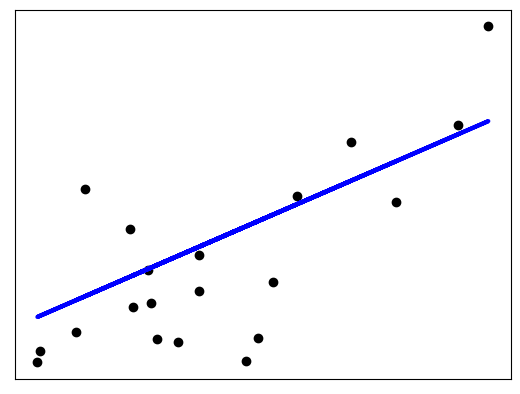

In [11]:

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
% mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()